## 1. Project Machine Learning: Analisis Harga Mobil Toyota

### Identitas Lengkap
- **Nama:** Akhmad Haris
- **Nim:** A11.2022.14626
- **Matkul:** Pembelajaran Mesin 
- **Kelompok:** A11.4413


## 2. Ringkasan dan Permasalahan Project

### Ringkasan
Proyek ini bertujuan untuk memprediksi harga mobil Toyota berdasarkan beberapa fitur seperti tahun, jarak tempuh, pajak, mpg, dan ukuran mesin. Model ini diharapkan dapat memberikan estimasi harga mobil yang akurat sehingga dapat membantu dalam pengambilan keputusan untuk pembelian atau penjualan mobil.

### Permasalahan
Bagaimana cara memprediksi harga mobil dengan menggunakan dataset yang berisi informasi mengenai fitur-fitur mobil?

### Tujuan
- Membangun model machine learning untuk memprediksi harga mobil Toyota.
- Membandingkan performa model Linear Regression, Random Forest Regressor, dan Gradient Boosting Regressor.
- Melakukan tuning hyperparameter untuk meningkatkan performa model.


### Model / Alur Penyelesaian:

```mermaid
graph LR
   A[Mulai] --> B[Load dan Preprocessing Data]
    B --> C[EDA dan Feature Engineering]
    C --> D[Pemisahan Data Train dan Test]
    D --> E[Modeling]
    E --> F[Evaluasi Model]
    F --> G[Selesai]

## 3. Penjelasan Dataset,EDA, dan Proses Features Dataset 

### Dataset
Dataset yang digunakan adalah dataset harga mobil Toyota yang berisi informasi tentang harga mobil dan beberapa fitur seperti tahun, jarak tempuh, pajak, mpg, ukuran mesin, dan model mobil.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Load dataset
data = pd.read_csv('toyota.csv')

# Tampilkan 5 baris pertama dataset
data.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Eksplorasi Data Awal (EDA)
- Melihat distribusi data
- Menemukan pola atau korelasi antara fitur
- Mengidentifikasi nilai-nilai yang hilang dan outlier


+-------------------+---------+
|    Description    |  Value  |
+-------------------+---------+
|  Number of Rows   |  6738   |
| Number of Columns |    9    |
|   Memory Usage    | 0.46 MB |
+-------------------+---------+
              year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6738.000000  
mean      1.471297  
std       0.436159 

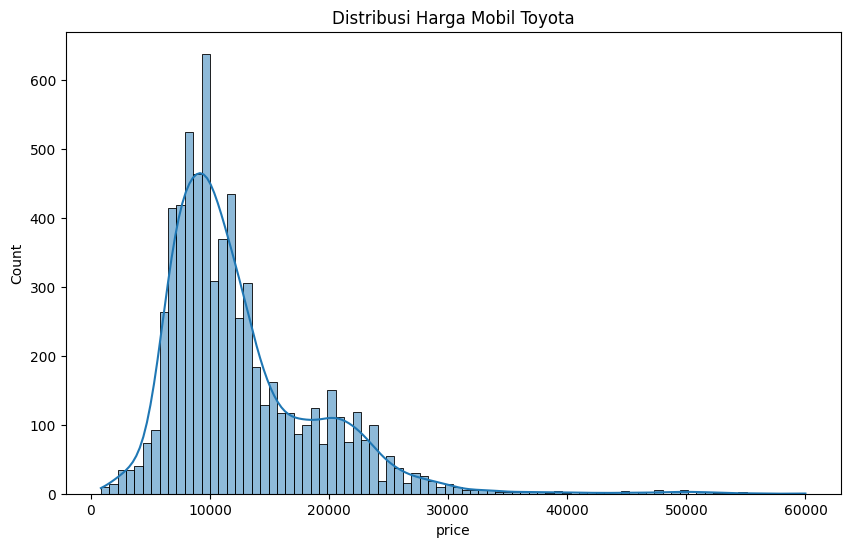

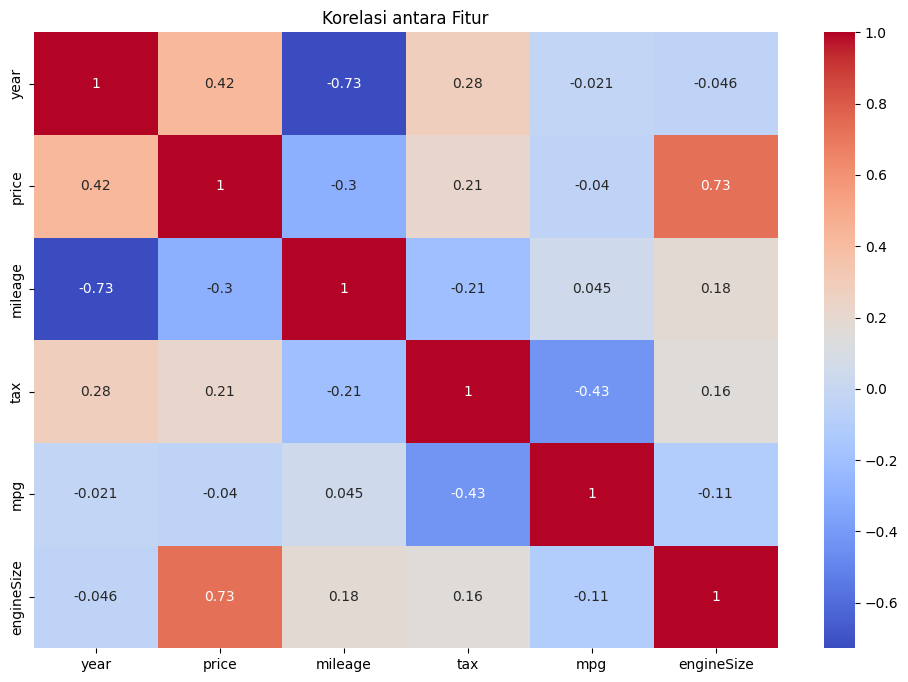

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset
data = pd.read_csv('toyota.csv')

# Informasi umum tentang dataset
info_data = [
    ["Number of Rows", data.shape[0]],
    ["Number of Columns", data.shape[1]],
    ["Memory Usage", f"{data.memory_usage().sum() / 1024 ** 2:.2f} MB"]
]
print(tabulate(info_data, headers=["Description", "Value"], tablefmt="pretty"))


# Statistik deskriptif dari dataset
print(data.describe())

# Melihat distribusi harga
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribusi Harga Mobil Toyota')
plt.show()

# Identifikasi kolom numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Melihat korelasi antara fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Fitur')
plt.show()


### Proses Features Data
- Mengisi atau menghapus nilai yang hilang
- One-hot encoding untuk fitur kategorikal
- Scaling fitur numerik


In [8]:
# Load dataset dan pemodelan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('toyota.csv')

# One-hot encoding untuk fitur kategorikal
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Scaling features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('price', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[1:])
scaled_data['price'] = data['price']

# Tampilkan 5 baris pertama dari data yang telah diskalakan
scaled_data.head()


,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,16000,0.064400,2.305274,-1.695063,1.21227,-0.131772,-0.64071,-0.27664,-0.040438,-0.203128,...,-0.024372,-0.131187,-0.021105,-0.678016,0.872415,-0.012183,-0.197923,-0.659654,-0.125817,0.805383
1,15995,-0.221837,0.680915,-1.695063,1.21227,-0.131772,-0.64071,-0.27664,-0.040438,-0.203128,...,-0.024372,-0.131187,-0.021105,-0.678016,0.872415,-0.012183,-0.197923,-0.659654,-0.125817,0.805383
2,13998,0.241141,2.305274,-1.695063,1.21227,-0.131772,-0.64071,-0.27664,-0.040438,-0.203128,...,-0.024372,-0.131187,-0.021105,-0.678016,0.872415,-0.012183,-0.197923,-0.659654,-0.125817,0.805383
3,18998,-0.424670,0.748596,-1.695063,1.21227,-0.131772,-0.64071,-0.27664,-0.040438,-0.203128,...,-0.024372,-0.131187,-0.021105,-0.678016,0.872415,-0.012183,-0.197923,-0.659654,-0.125817,0.805383
4,17498,0.702079,0.680915,-1.695063,1.21227,-0.131772,-0.64071,-0.27664,-0.040438,-0.203128,...,-0.024372,-0.131187,-0.021105,-0.678016,0.872415,-0.012183,-0.197923,-0.659654,-0.125817,0.805383


## 4. Proses Learning / Modeling

### Pembagian Data dan Pemilihan Model
- Membagi dataset menjadi data latih dan data uji
- Memilih beberapa model Machine Learning


In [43]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('bmw.csv')

# Proses pembersihan data (contoh)
data = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], drop_first=True)

# Memisahkan fitur dan target
X = data.drop('price', axis=1)
y = data['price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data['price'] = y.reset_index(drop=True)

# Membagi data menjadi train dan test
X = scaled_data.drop('price', axis=1)
y = scaled_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# **Tanpa Tuning Hyperparameter**

# Training model tanpa tuning
print("Training models without hyperparameter tuning...\n")
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Prediksi menggunakan model tanpa tuning
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluasi model tanpa tuning
print("Evaluating models without hyperparameter tuning...\n")

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"  Mean Squared Error (MSE): {mse:,.2f}")
    print(f"  R-squared (R²): {r2:.4f}\n")

# Evaluasi model tanpa tuning
evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting Regressor')

# **Dengan Tuning Hyperparameter**

# Hyperparameter tuning untuk Random Forest dan Gradient Boosting
print("Performing hyperparameter tuning...\n")

# Grid Search CV untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")

# Grid Search CV untuk Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_
print(f"Best Gradient Boosting parameters: {gb_grid_search.best_params_}\n")

# Training model dengan hyperparameter terbaik
print("Training models with best hyperparameters...\n")
best_rf_model.fit(X_train, y_train)
best_gb_model.fit(X_train, y_train)

# Prediksi menggunakan model dengan tuning
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

# Evaluasi model dengan tuning
print("Evaluating models with hyperparameter tuning...\n")
evaluate_model(y_test, y_pred_rf, 'Best Random Forest Regressor')
evaluate_model(y_test, y_pred_gb, 'Best Gradient Boosting Regressor')


Training models without hyperparameter tuning...

Evaluating models without hyperparameter tuning...

Random Forest Regressor Results:
  Mean Absolute Error (MAE): 1,615.43
  Mean Squared Error (MSE): 7,441,319.01
  R-squared (R²): 0.9425

Gradient Boosting Regressor Results:
  Mean Absolute Error (MAE): 2,151.98
  Mean Squared Error (MSE): 11,165,009.78
  R-squared (R²): 0.9137

Performing hyperparameter tuning...

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Training models with best hyperparameters...

Evaluating models with hyperparameter tuning...

Best Random Forest Regressor Results:
  Mean Absolute Error (MAE): 1,602.09
  Mean Squared Error (MSE): 7,325,914.93
  R-squared (R²): 0.9433

Best Gra

## 5. Performa Model

### Evaluasi Model
- Menggunakan metrik seperti MAE, MSE, dan R² untuk mengevaluasi performa model


In [42]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membagi data menjadi train dan test
X = scaled_data.drop('price', axis=1)
y = scaled_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning untuk Random Forest dan Gradient Boosting
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Grid Search CV untuk Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Grid Search CV untuk Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

# Training model
best_rf_model.fit(X_train, y_train)
best_gb_model.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

# Evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("\n")

# Evaluasi hasil model
evaluate_model(y_test, y_pred_rf, 'Best Random Forest Regressor')
evaluate_model(y_test, y_pred_gb, 'Best Gradient Boosting Regressor')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Random Forest Regressor Results:
Mean Absolute Error (MAE): 806.74
Mean Squared Error (MSE): 1476087.48
R-squared (R²): 0.9653


Best Gradient Boosting Regressor Results:
Mean Absolute Error (MAE): 744.87
Mean Squared Error (MSE): 1282316.47
R-squared (R²): 0.9699




## 6. Diskusi Hasil dan Kesimpulan

### Diskusi Hasil
- **Random Forest**: Model ini menunjukkan performa yang sangat baik dengan R² yang tinggi, menunjukkan kemampuan yang baik dalam menangani data yang kompleks.
- **Gradient Boosting**: Model ini juga memberikan performa yang baik, sedikit lebih baik dari Linear Regression namun masih di bawah Random Forest dalam hal akurasi prediksi.

### Kesimpulan
Berdasarkan hasil evaluasi, model Random Forest adalah yang terbaik untuk prediksi harga mobil bekas Toyota dalam dataset ini. Langkah selanjutnya bisa termasuk lebih banyak tuning hyperparameter untuk model Random Forest atau mencoba model-model lain yang lebih canggih untuk peningkatan akurasi lebih lanjut.
